In [1]:
import sys
sys.path.append('../')

import warnings
warnings.filterwarnings("ignore")

from utils import *
from tqdm.auto import tqdm
import numpy as np
import pickle
import os

from experiment import unpack_and_dequantize

import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({"font.size" : 15,
                     "figure.dpi" : 100, 
                     "grid.alpha" : 0.3, 
                     "axes.grid": False, 
                     "axes.axisbelow" : True,
                     "figure.figsize":(8,6),
                     "mathtext.fontset":"cm",
                     "xtick.labelsize": 14,
                     "ytick.labelsize": 14,
                     "axes.labelsize": 16, 
                     "legend.fontsize": 13.5})
plt.rc("text", usetex=False)
plt.rc("font", family="serif")

In [3]:
for i, model in enumerate(["../cpt/"]):
    file_list = os.listdir(model)
    w_final_cpt = np.array([])
    h_final_cpt = np.array([])
    for f in tqdm(file_list):
        with open(model+f, "rb") as file:
            res = pickle.load(file)
        w = unpack_and_dequantize(res["wealth"][:,-1], 200)
        h = unpack_and_dequantize(res["health"][:,-1], 200)
        w_final_cpt = np.concatenate([w_final_cpt, w])
        h_final_cpt = np.concatenate([h_final_cpt, h])

  0%|          | 0/1024 [00:00<?, ?it/s]

In [4]:
for i, model in enumerate(["../pt/"]):
    file_list = os.listdir(model)
    w_final_pt = np.array([])
    h_final_pt = np.array([])
    for f in tqdm(file_list):
        with open(model+f, "rb") as file:
            res = pickle.load(file)
        w = unpack_and_dequantize(res["wealth"][:,-1], 200)
        h = unpack_and_dequantize(res["health"][:,-1], 200)
        w_final_pt = np.concatenate([w_final_pt, w])
        h_final_pt = np.concatenate([h_final_pt, h])

  0%|          | 0/1024 [00:00<?, ?it/s]

In [5]:
for i, model in enumerate(["../eut/"]):
    file_list = os.listdir(model)
    w_final_eut = np.array([])
    h_final_eut = np.array([])
    for f in tqdm(file_list):
        with open(model+f, "rb") as file:
            res = pickle.load(file)
        w = unpack_and_dequantize(res["wealth"][:,-1], 200)
        h = unpack_and_dequantize(res["health"][:,-1], 200)
        w_final_eut = np.concatenate([w_final_eut, w])
        h_final_eut = np.concatenate([h_final_eut, h])

  0%|          | 0/1024 [00:00<?, ?it/s]

### Steady State Comparison

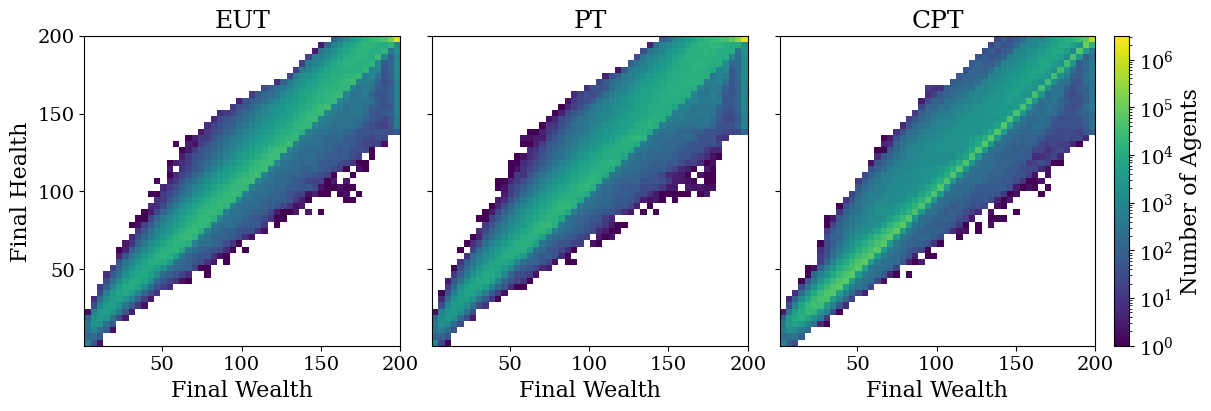

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(12,4), sharey=True, constrained_layout=True)

im1 = axs[0].hist2d(w_final_eut, h_final_eut, bins=50, cmap='viridis', norm="log", vmin=1, vmax=10**6.5)
axs[0].set_xlabel('Final Wealth')
axs[0].set_ylabel('Final Health')
axs[0].set_xlim(1, 200)
axs[0].set_ylim(1, 200)
axs[0].set_title("EUT")

im1 = axs[1].hist2d(w_final_pt, h_final_pt, bins=50, cmap='viridis', norm="log", vmin=1, vmax=10**6.5)
axs[1].set_xlabel('Final Wealth')
axs[1].set_xlim(1, 200)
axs[1].set_ylim(1, 200)
axs[1].set_title("PT")

im0 = axs[2].hist2d(w_final_cpt, h_final_cpt, bins=50, cmap='viridis', norm="log", vmin=1, vmax=10**6.5)
axs[2].set_xlabel('Final Wealth')
axs[2].set_xlim(1,200)
axs[2].set_ylim(1,200)
axs[2].set_title("CPT")

cbar = fig.colorbar(im1[3], ax=axs, orientation='vertical', fraction=0.05, pad=0)
cbar.set_label('Number of Agents')

plt.savefig("../figures/steady_state_comparison.pdf", bbox_inches="tight")
plt.show()

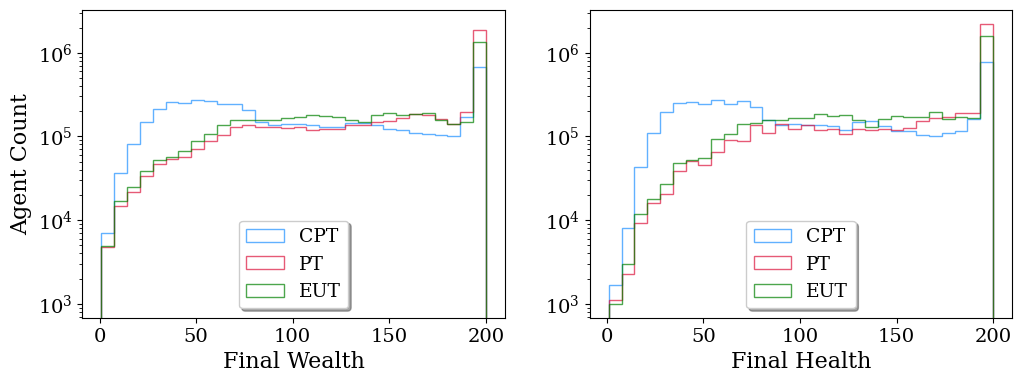

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(12,4), sharey=True)

alpha_val = 0.7
n_bins = 30

axs[0].hist(
    w_final_cpt,
    bins=n_bins,
    color="dodgerblue",
    alpha=alpha_val,
    label="CPT",
    histtype="step"
)
axs[0].hist(
    w_final_pt,
    bins=n_bins,
    color="crimson",
    alpha=alpha_val,
    label="PT",
    histtype="step"
)
axs[0].hist(
    w_final_eut,
    bins=n_bins,
    color="green",
    alpha=alpha_val,
    label="EUT",
    histtype="step"
)
axs[0].legend(shadow=True)
axs[0].set_xlabel("Final Wealth")
axs[0].set_yscale("log")
axs[0].set_ylabel("Agent Count")

axs[1].hist(
    h_final_cpt,
    bins=n_bins,
    color="dodgerblue",
    alpha=alpha_val,
    label="CPT",
    histtype="step"
)
axs[1].hist(
    h_final_pt,
    bins=n_bins,
    color="crimson",
    alpha=alpha_val,
    label="PT",
    histtype="step"
)
axs[1].hist(
    h_final_eut,
    bins=n_bins,
    color="green",
    alpha=alpha_val,
    label="EUT",
    histtype="step"
)
axs[1].legend(shadow=True)
axs[1].set_yscale("log")
axs[1].set_xlabel("Final Health")

for a in axs:
    a.tick_params(axis='y', which='both', labelleft=True)

plt.show()